In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

# Using pandas to load the CSV file into a DataFrame.
# Inspecting the first few rows to understand the structure and content.
df = pd.read_csv('stop_tb_data2.csv')
print(df.head())



  country_name  year iso3_code  fragility  fragilityindex g_whoregion  \
0       Zambia  2000       ZMB  Neighbour            87.2         AFR   
1       Zambia  2001       ZMB  Neighbour            87.2         AFR   
2       Zambia  2002       ZMB  Neighbour            87.2         AFR   
3       Zambia  2003       ZMB  Neighbour            87.2         AFR   
4       Zambia  2004       ZMB  Neighbour            87.2         AFR   

   gendertool gf_eligible_2016 gf_eligible_2018    globalplangroup  ...  \
0         NaN              Yes              Yes  High TB-HIV, SADC  ...   
1         NaN              Yes              Yes  High TB-HIV, SADC  ...   
2         NaN              Yes              Yes  High TB-HIV, SADC  ...   
3         NaN              Yes              Yes  High TB-HIV, SADC  ...   
4         NaN              Yes              Yes  High TB-HIV, SADC  ...   

   used_2021_defs_flg xdr xdr_coh xdr_died  xdr_fail xdr_lost  xdr_succ xpert  \
0                 NaN NaN    

In [2]:
# Checking the number of missing values per column
missing_values_count = df.isnull().sum()

# Checking the percentage of missing values per column
missing_values_percentage = df.isnull().mean() * 100

# Print results
print(missing_values_count)
print(missing_values_percentage)


country_name       0
year               0
iso3_code          0
fragility          0
fragilityindex     0
                  ..
xdr_lost          20
xdr_succ          20
xpert             23
xpert_eqa         23
xpert_etrans      23
Length: 934, dtype: int64
country_name       0.000000
year               0.000000
iso3_code          0.000000
fragility          0.000000
fragilityindex     0.000000
                    ...    
xdr_lost          71.428571
xdr_succ          71.428571
xpert             82.142857
xpert_eqa         82.142857
xpert_etrans      82.142857
Length: 934, dtype: float64


In [3]:
# Dropping columns with more than 60% missing values


df = df.dropna(thresh=len(df) * 0.6, axis=1)

# Filling missing values with median for numerical columns
numeric_columns = df.select_dtypes(include=[np.number]).columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())


In [4]:
# Checking the number of missing values per column again
missing_values_count = df.isnull().sum()

# Checking the percentage of missing values per column again
missing_values_percentage = df.isnull().mean() * 100

# Print results
print(missing_values_count)
print(missing_values_percentage)


country_name            0
year                    0
iso3_code               0
fragility               0
fragilityindex          0
                       ..
e_tbhiv_prct_hi         0
e_tbhiv_prct_lo         0
new_ep                  0
new_labconf             0
notified_dr_tb_cases    0
Length: 94, dtype: int64
country_name            0.0
year                    0.0
iso3_code               0.0
fragility               0.0
fragilityindex          0.0
                       ... 
e_tbhiv_prct_hi         0.0
e_tbhiv_prct_lo         0.0
new_ep                  0.0
new_labconf             0.0
notified_dr_tb_cases    0.0
Length: 94, dtype: float64


In [5]:
# Display the first few rows of the dataframe
print(df.head())

# Display a summary of the dataframe to check data types and non-null counts
print(df.info())


  country_name  year iso3_code  fragility  fragilityindex g_whoregion  \
0       Zambia  2000       ZMB  Neighbour            87.2         AFR   
1       Zambia  2001       ZMB  Neighbour            87.2         AFR   
2       Zambia  2002       ZMB  Neighbour            87.2         AFR   
3       Zambia  2003       ZMB  Neighbour            87.2         AFR   
4       Zambia  2004       ZMB  Neighbour            87.2         AFR   

  gf_eligible_2016 gf_eligible_2018    globalplangroup  \
0              Yes              Yes  High TB-HIV, SADC   
1              Yes              Yes  High TB-HIV, SADC   
2              Yes              Yes  High TB-HIV, SADC   
3              Yes              Yes  High TB-HIV, SADC   
4              Yes              Yes  High TB-HIV, SADC   

   gnipercapita_2018_atlas  ... e_mort_tbhiv_num e_mort_tbhiv_num_hi  \
0                     1430  ...          19000.0             29000.0   
1                     1430  ...          19000.0             29000.0

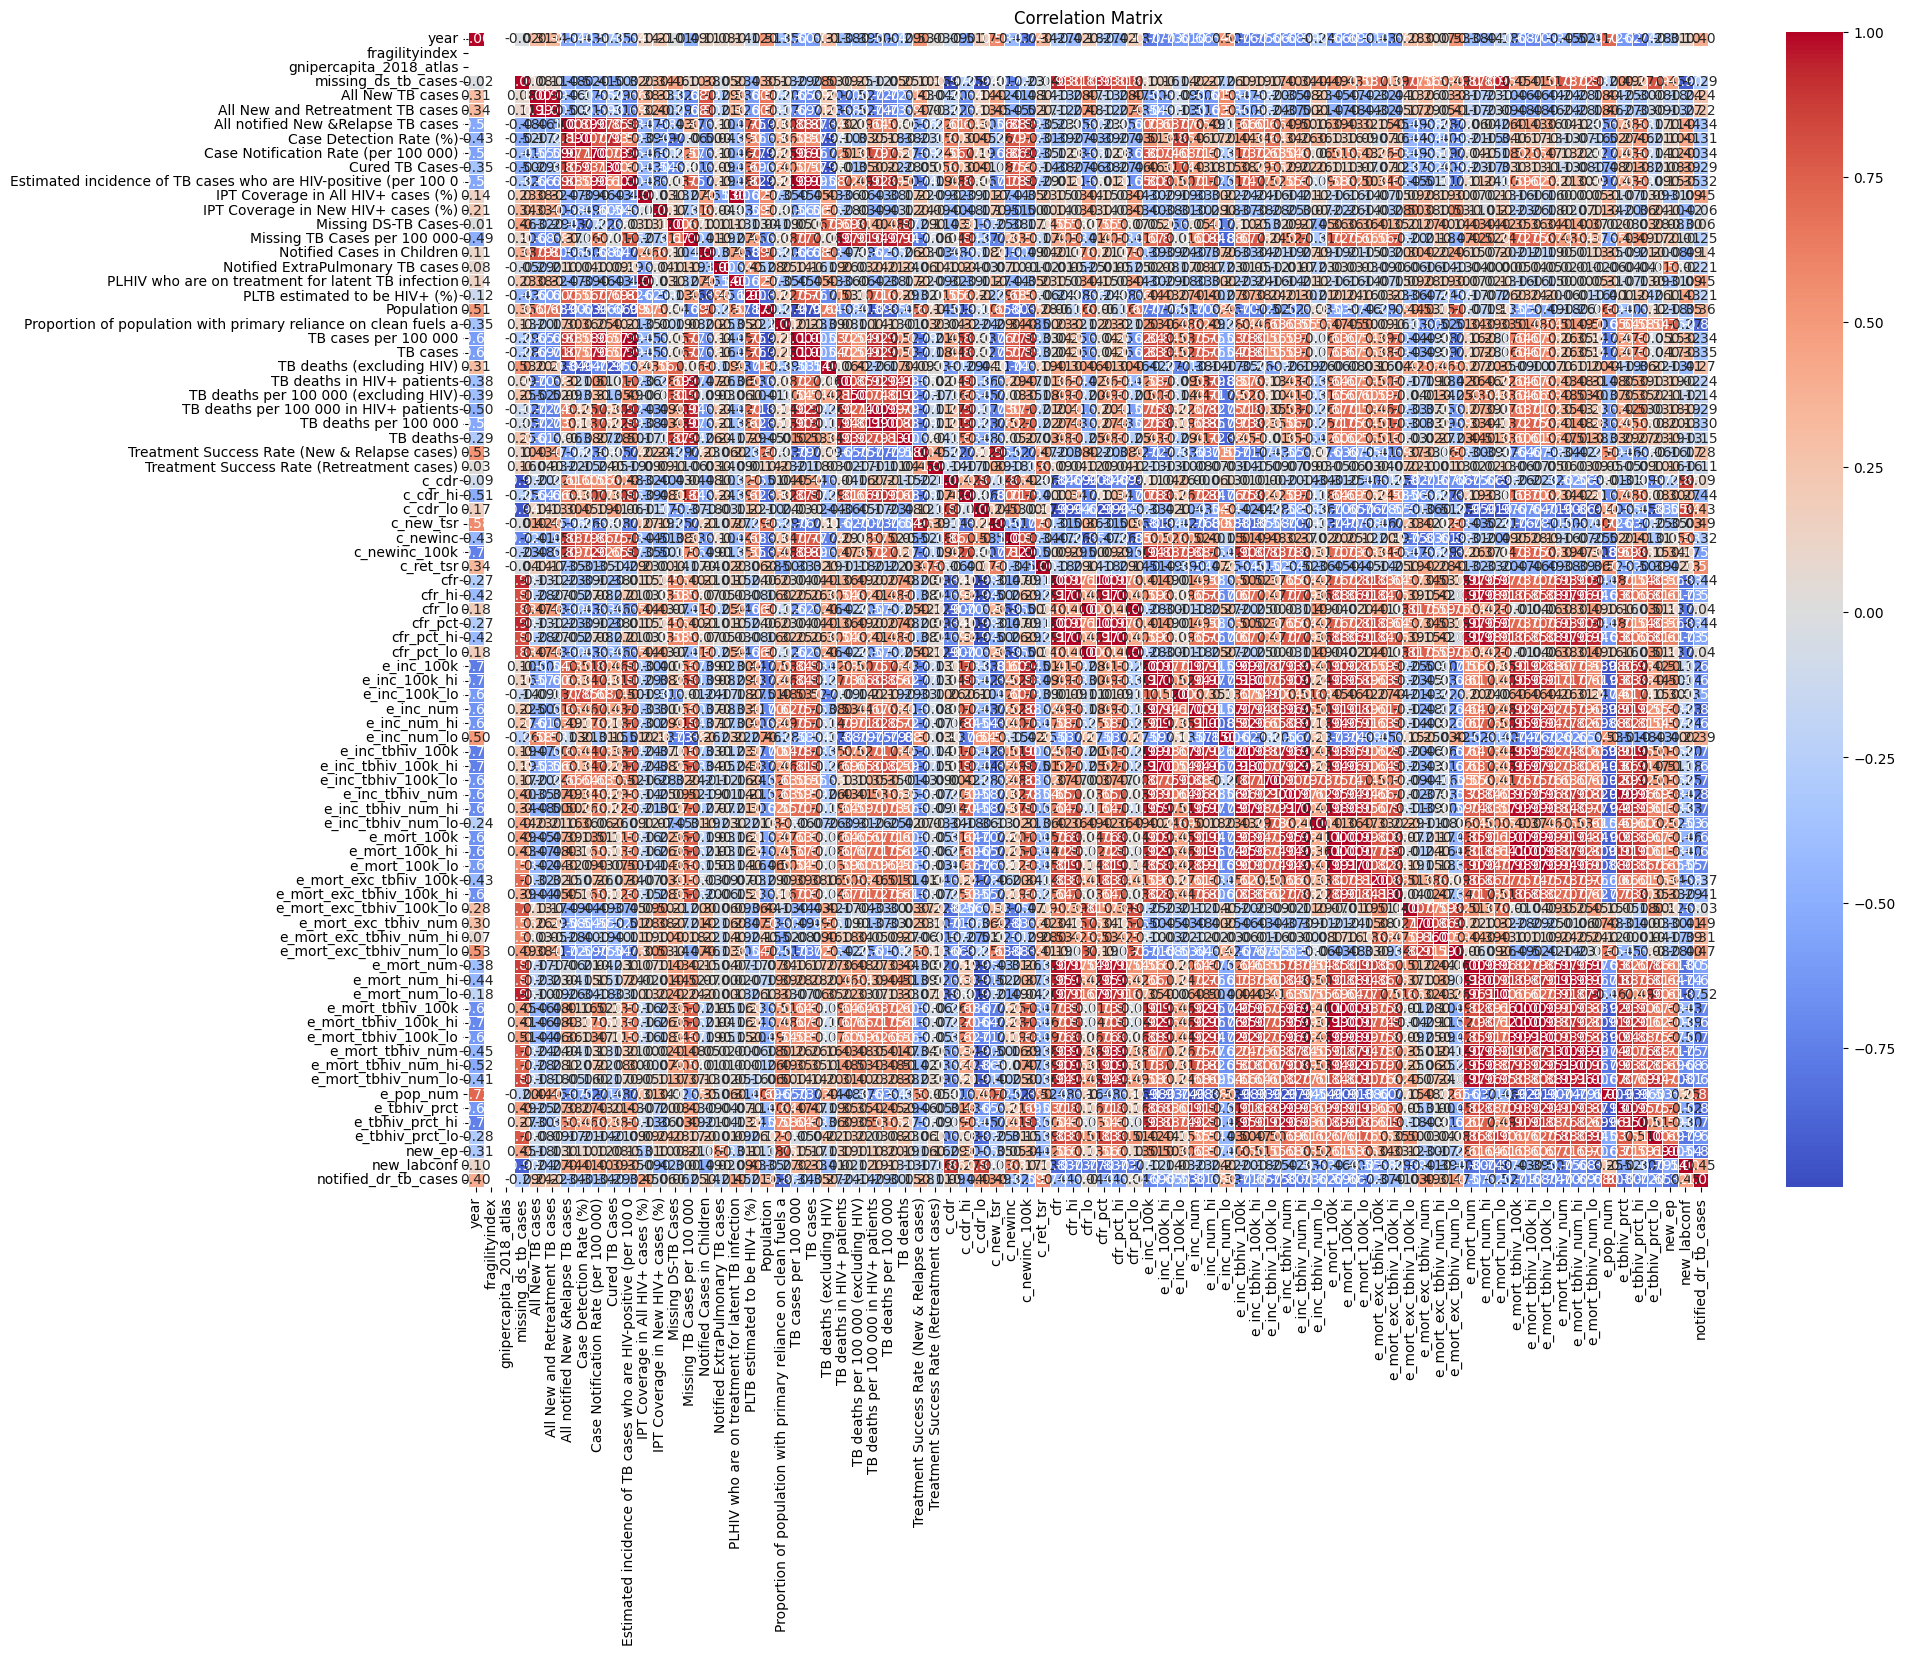

In [6]:
# Drop non-numeric or irrelevant columns
df_filtered = df.drop(columns=['country_name', 'iso3_code', 'g_whoregion'])

# Convert remaining categorical columns to numeric using one-hot encoding
df_numeric = pd.get_dummies(df_filtered, drop_first=True)

# Calculate the correlation matrix
correlation_matrix = df_numeric.corr()

# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(20, 15))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [7]:
# Load the WHO dataset
who_df = pd.read_csv('tb_incidence_data_zambia.csv')

# Rename 'Year' to 'year' in who_df 
who_df.rename(columns={'Year': 'year'}, inplace=True)

# Now merge again
merged_df = pd.merge(df, who_df, on='year', how='inner')

# Display the merged DataFrame
print(merged_df.head())



  country_name  year iso3_code  fragility  fragilityindex g_whoregion  \
0       Zambia  2000       ZMB  Neighbour            87.2         AFR   
1       Zambia  2001       ZMB  Neighbour            87.2         AFR   
2       Zambia  2002       ZMB  Neighbour            87.2         AFR   
3       Zambia  2003       ZMB  Neighbour            87.2         AFR   
4       Zambia  2004       ZMB  Neighbour            87.2         AFR   

  gf_eligible_2016 gf_eligible_2018    globalplangroup  \
0              Yes              Yes  High TB-HIV, SADC   
1              Yes              Yes  High TB-HIV, SADC   
2              Yes              Yes  High TB-HIV, SADC   
3              Yes              Yes  High TB-HIV, SADC   
4              Yes              Yes  High TB-HIV, SADC   

   gnipercapita_2018_atlas  ... new_labconf notified_dr_tb_cases Country  \
0                     1430  ...     14857.0                  0.0     ZMB   
1                     1430  ...     14857.0                 

In [8]:
# Export the merged DataFrame to a CSV file
merged_df.to_csv('merged_tb_data.csv', index=False)

In [9]:
print(merged_df.describe())

             year  fragilityindex  gnipercapita_2018_atlas  \
count    23.00000    2.300000e+01                     23.0   
mean   2011.00000    8.720000e+01                   1430.0   
std       6.78233    1.453024e-14                      0.0   
min    2000.00000    8.720000e+01                   1430.0   
25%    2005.50000    8.720000e+01                   1430.0   
50%    2011.00000    8.720000e+01                   1430.0   
75%    2016.50000    8.720000e+01                   1430.0   
max    2022.00000    8.720000e+01                   1430.0   

       missing_ds_tb_cases  All New TB cases  \
count            23.000000         23.000000   
mean          22007.065217      24977.000000   
std            5787.568233       9555.119632   
min            4873.000000       8524.000000   
25%           20212.000000      22914.000000   
50%           24131.500000      23982.000000   
75%           26029.500000      31479.000000   
max           27741.000000      40638.000000   

       A

                                                    TB cases per 100 000  \
year                                                           -0.772847   
missing_ds_tb_cases                                            -0.286693   
All New TB cases                                               -0.655675   
All New and Retreatment TB cases                               -0.687387   
All notified New &Relapse TB cases                              0.875859   
Case Detection Rate (%)                                         0.574624   
Case Notification Rate (per 100 000)                            0.962561   
Cured TB Cases                                                  0.566312   
Estimated incidence of TB cases who are HIV-pos...              0.995360   
IPT Coverage in All HIV+ cases (%)                             -0.462330   
IPT Coverage in New HIV+ cases (%)                             -0.569693   
Missing DS-TB Cases                                             0.052819   
Missing TB C

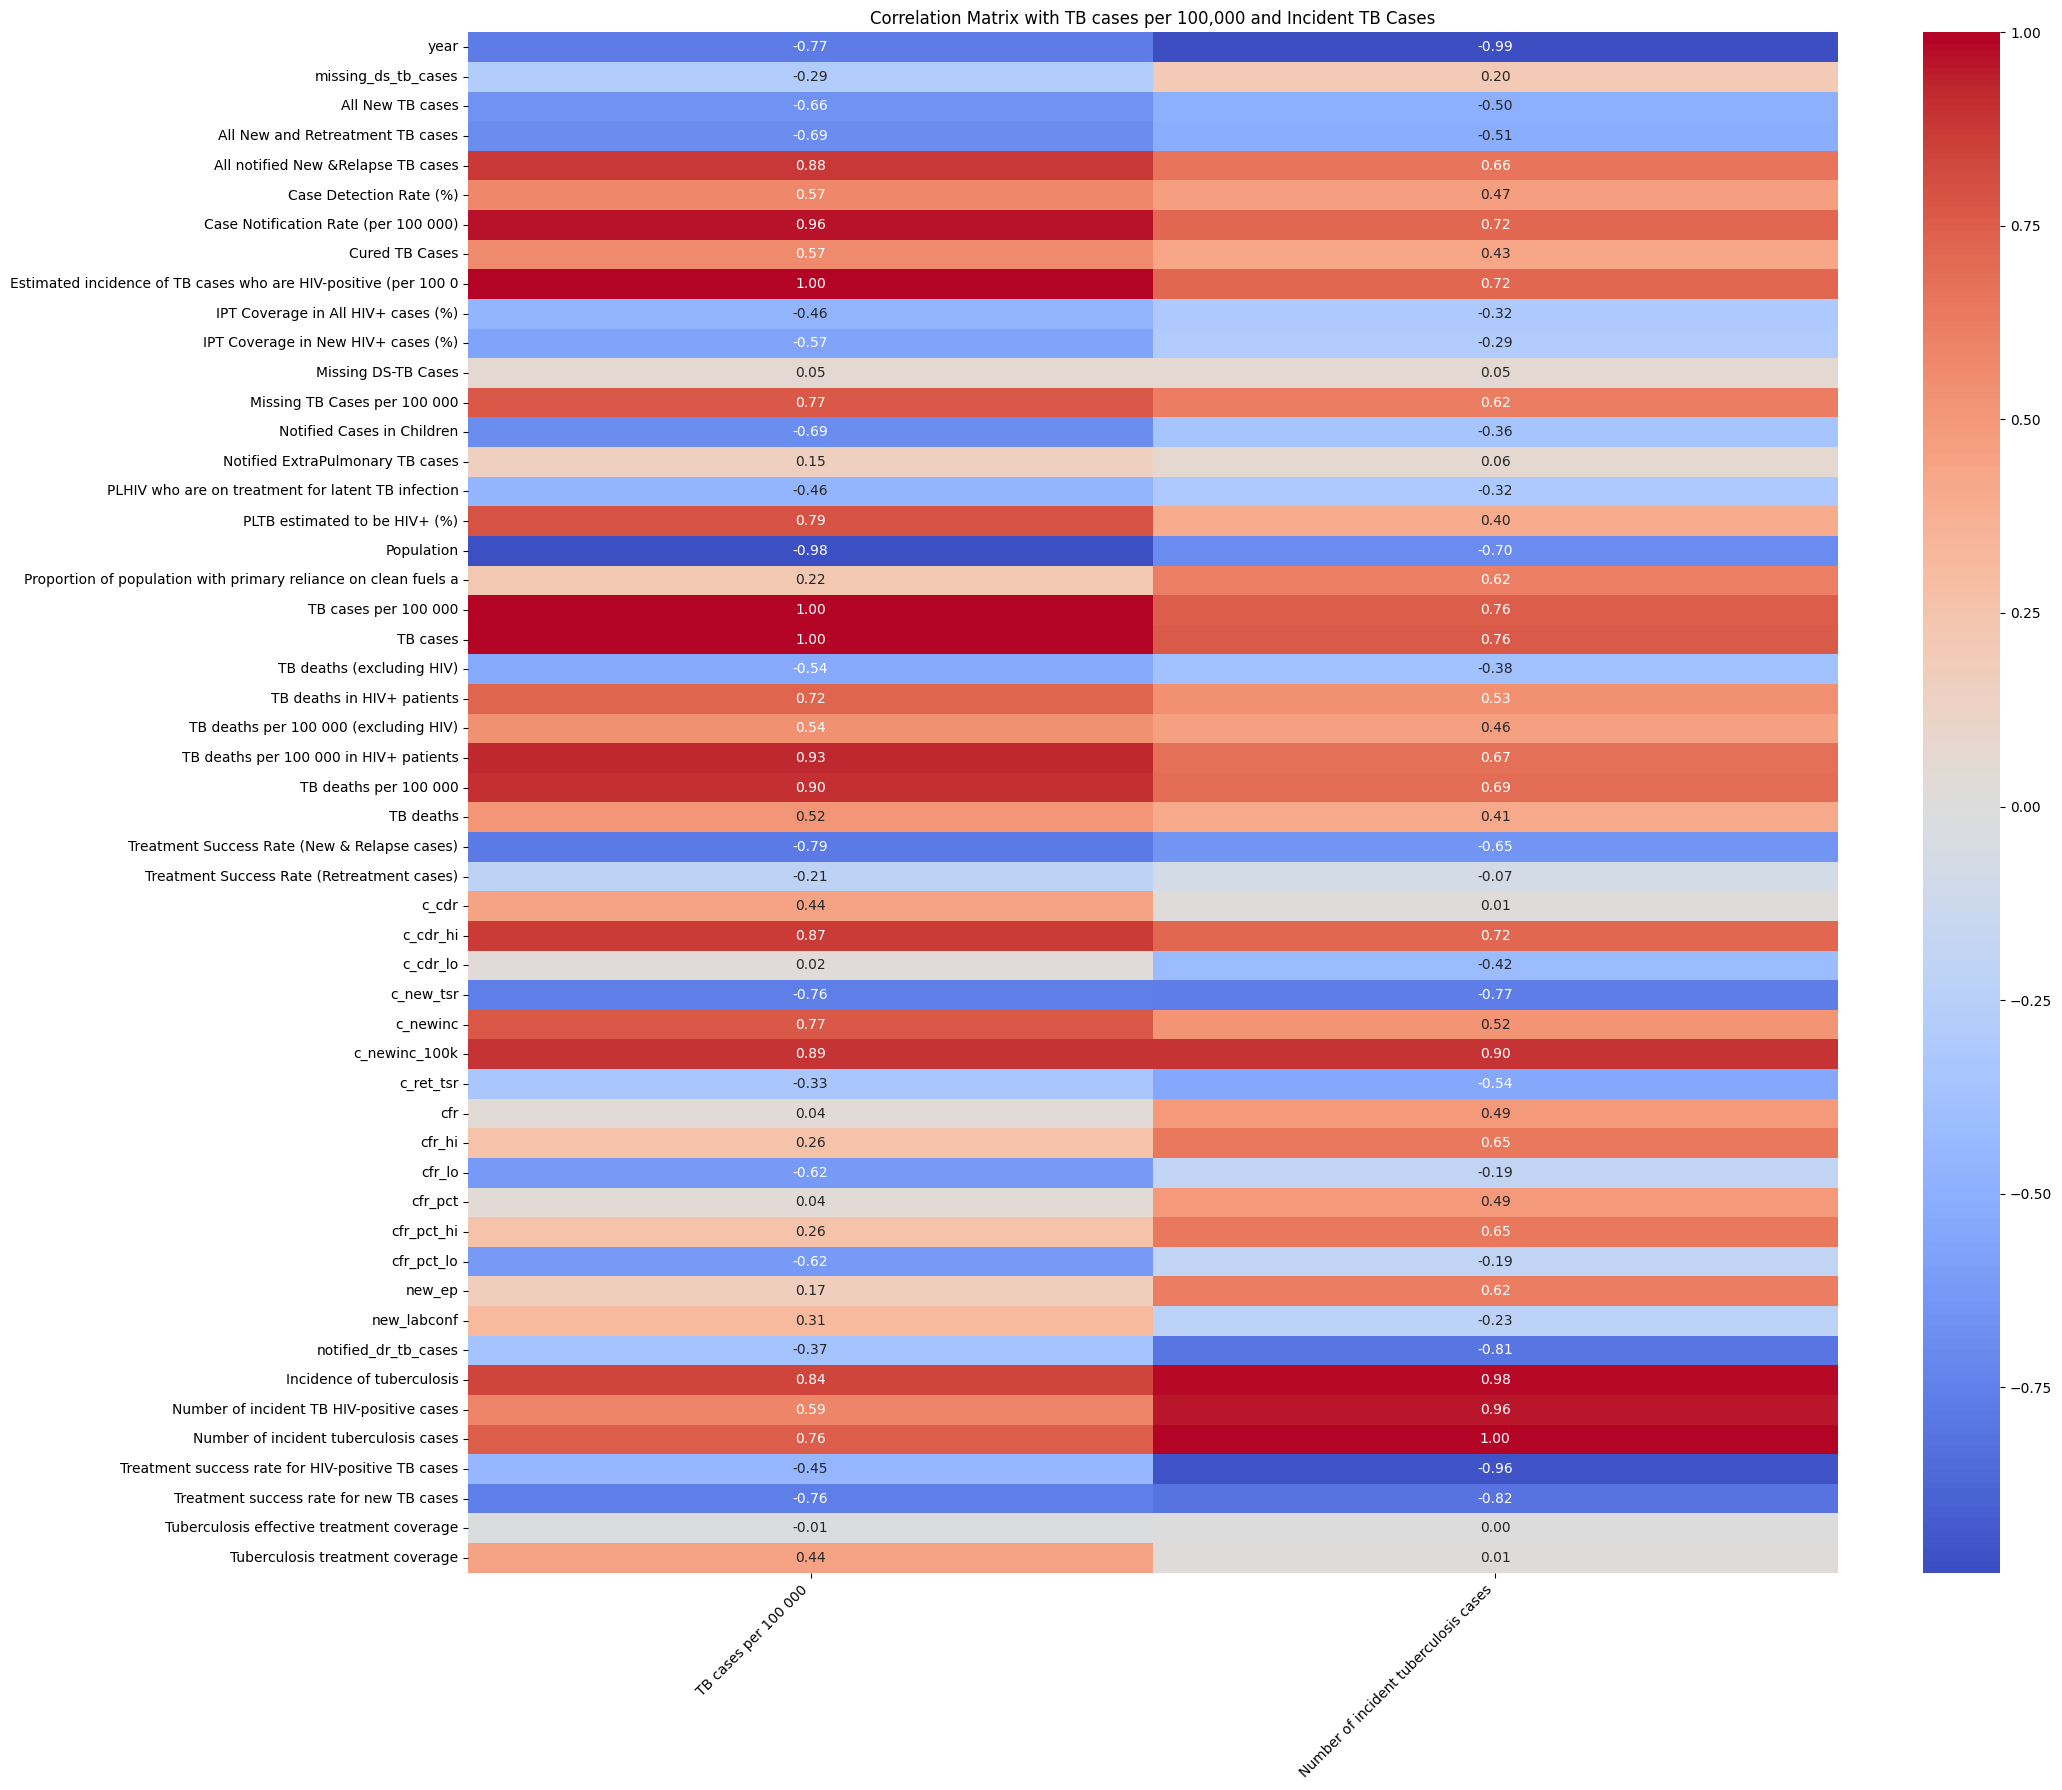

In [10]:
# Drop columns that start with 'e_' or 'estimated'
columns_to_drop = [col for col in merged_df.columns if col.startswith('e_') or col.startswith('estimated')]
merged_df = merged_df.drop(columns=columns_to_drop)

# Convert categorical variables to numerical using one-hot encoding
merged_df_encoded = pd.get_dummies(merged_df, drop_first=True)

# List of target variables
target_vars = ['TB cases per 100 000', 'Number of incident tuberculosis cases']

# Compute the correlation matrix for all variables against the target variables
correlation_matrix = merged_df_encoded.corr()

# Extract correlations with the target variables
correlation_with_tb = correlation_matrix[target_vars].dropna()

# Display the correlation matrix for inspection
print(correlation_with_tb)

# Generate a heatmap for the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(22, 18))
sns.heatmap(correlation_with_tb, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Correlation Matrix with TB cases per 100,000 and Incident TB Cases')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


Model for 'TB cases per 100 000'


c:\Users\tlche\OneDrive\Documents\GitHub\Predictive-Analytics-for-Tuberculosis-TB-Incidence-and-Treatment-Adherence\tbvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\tlche\OneDrive\Documents\GitHub\Predictive-Analytics-for-Tuberculosis-TB-Incidence-and-Treatment-Adherence\tbvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\tlche\OneDrive\Documents\GitHub\Predictive-Analytics-for-Tuberculosis-TB-Incidence-and-Treatment-Adherence\tbvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)


RMSE: 185.35319087827412


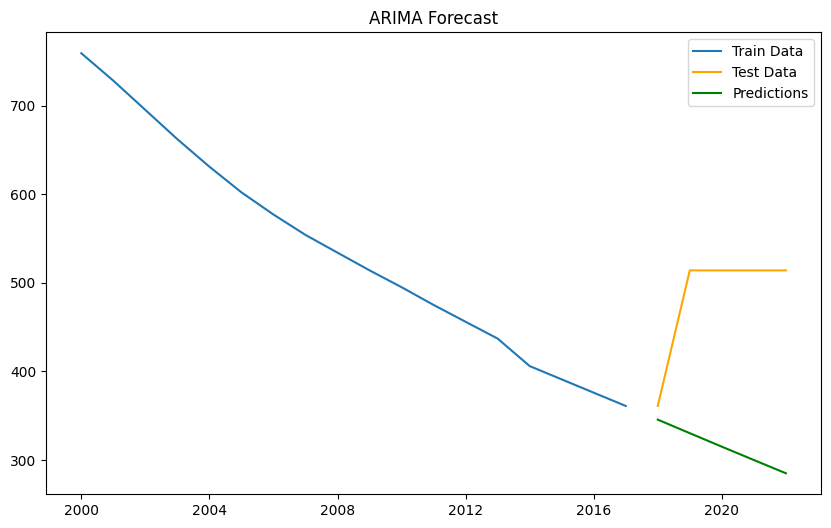


Model for 'Number of incident tuberculosis cases'


c:\Users\tlche\OneDrive\Documents\GitHub\Predictive-Analytics-for-Tuberculosis-TB-Incidence-and-Treatment-Adherence\tbvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\tlche\OneDrive\Documents\GitHub\Predictive-Analytics-for-Tuberculosis-TB-Incidence-and-Treatment-Adherence\tbvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\tlche\OneDrive\Documents\GitHub\Predictive-Analytics-for-Tuberculosis-TB-Incidence-and-Treatment-Adherence\tbvenv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\Users\tlche\OneDrive\Documents\GitHub\Predictive-Analytics-for-Tuberculos

RMSE: 1333.9503076259862


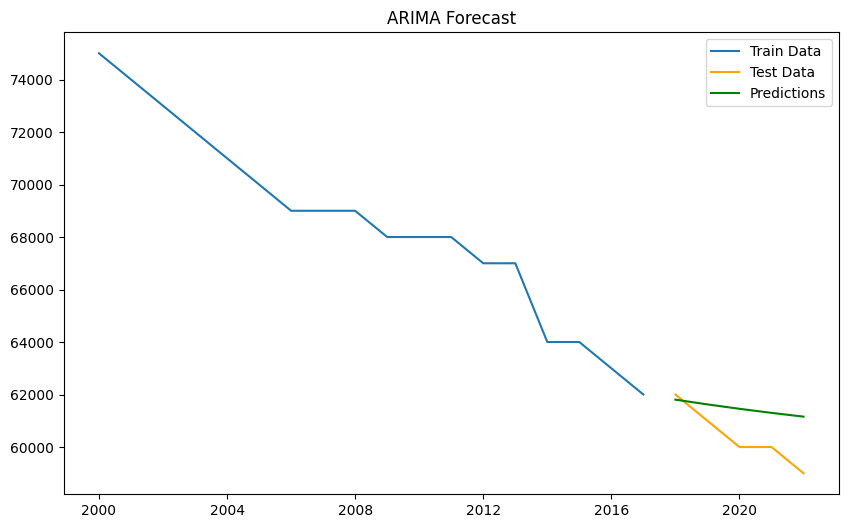

In [11]:
# Loading the data
# Ensuring 'year' is the index
merged_df_encoded['year'] = pd.to_datetime(merged_df_encoded['year'], format='%Y')
merged_df_encoded.set_index('year', inplace=True)

# Select the two target variables
tb_cases = merged_df_encoded['TB cases per 100 000']
tb_incidence = merged_df_encoded['Number of incident tuberculosis cases']

# I split the data into training and testing sets (80% train, 20% test)
train_size = int(len(tb_cases) * 0.8)
train_tb_cases, test_tb_cases = tb_cases[:train_size], tb_cases[train_size:]
train_tb_incidence, test_tb_incidence = tb_incidence[:train_size], tb_incidence[train_size:]

# Function to build and evaluate ARIMA model
def arima_forecast(train, test, order=(1,1,1)):
    # Fit ARIMA model
    model = ARIMA(train, order=order)
    model_fit = model.fit()

    # Making predictions
    predictions = model_fit.forecast(steps=len(test))
    
    # Evaluating model performance
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f'RMSE: {rmse}')
    
    # Ploting the results
    plt.figure(figsize=(10,6))
    plt.plot(train.index, train, label='Train Data')
    plt.plot(test.index, test, label='Test Data', color='orange')
    plt.plot(test.index, predictions, label='Predictions', color='green')
    plt.title('ARIMA Forecast')
    plt.legend()
    plt.show()
    
    return model_fit, predictions

# Build for ARIMA model for 'TB cases per 100 000'
print("Model for 'TB cases per 100 000'")
arima_tb_cases, tb_cases_predictions = arima_forecast(train_tb_cases, test_tb_cases)

# Build ARIMA model for 'Number of incident tuberculosis cases'
print("\nModel for 'Number of incident tuberculosis cases'")
arima_tb_incidence, tb_incidence_predictions = arima_forecast(train_tb_incidence, test_tb_incidence)

Model for 'TB cases per 100 000' with exogenous variables
Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.53 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=101.991, Time=0.01 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=100.713, Time=0.01 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.05 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=100.578, Time=0.01 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.08 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 0.703 seconds
Best ARIMA order: (0, 2, 0)
RMSE: 184.53780100564762


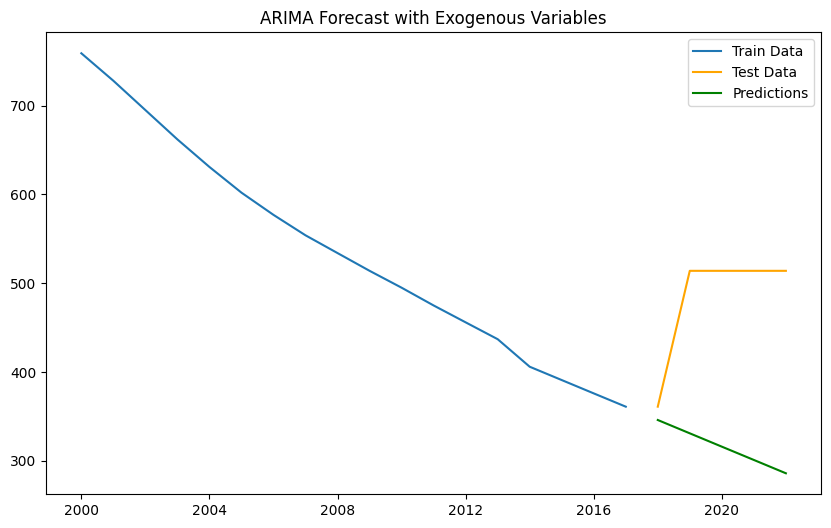

ValueError: could not broadcast input array from shape (18,) into shape (21,)

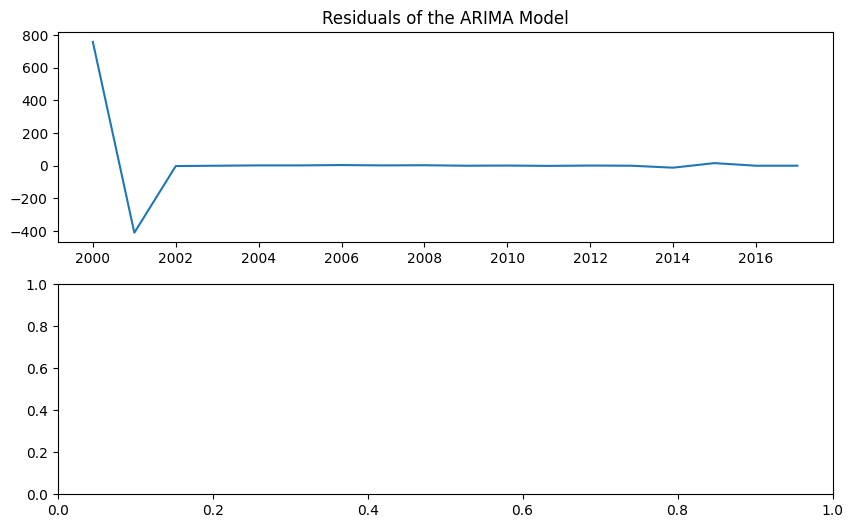

In [14]:


# Select the target and exogenous variables
tb_cases = merged_df_encoded['TB cases per 100 000']
tb_incidence = merged_df_encoded['Number of incident tuberculosis cases']
tb_cases_solid = merged_df_encoded['TB cases']  # Example exogenous variable
population = merged_df_encoded['Population']  # Another exogenous variable

# Combine exogenous variables into a matrix (X)
exog = merged_df_encoded[['TB cases', 'Population']]

# Split the data into training and testing sets (80% train, 20% test)
train_size = int(len(tb_cases) * 0.8)
train_tb_cases, test_tb_cases = tb_cases[:train_size], tb_cases[train_size:]
train_tb_incidence, test_tb_incidence = tb_incidence[:train_size], tb_incidence[train_size:]

# Also split exogenous variables for training and testing
train_exog, test_exog = exog[:train_size], exog[train_size:]

# 1. Function to build and evaluate ARIMA model with auto ARIMA
def arima_forecast_with_auto(train, test, exog_train=None, exog_test=None):
    # Use auto_arima to find the best order
    model = pm.auto_arima(train, exogenous=exog_train, seasonal=False, trace=True,
                          suppress_warnings=True, stepwise=True)
    print(f'Best ARIMA order: {model.order}')
    
    # Fit ARIMA model
    model_fit = model.fit(train, exogenous=exog_train)

    # Make predictions
    predictions = model_fit.predict(n_periods=len(test), exogenous=exog_test)
    
    # Evaluate model performance
    rmse = np.sqrt(mean_squared_error(test, predictions))
    print(f'RMSE: {rmse}')
    
    # Plot the results
    plt.figure(figsize=(10,6))
    plt.plot(train.index, train, label='Train Data')
    plt.plot(test.index, test, label='Test Data', color='orange')
    plt.plot(test.index, predictions, label='Predictions', color='green')
    plt.title('ARIMA Forecast with Exogenous Variables')
    plt.legend()
    plt.show()
    
    return model_fit, predictions

# 2. Function for model diagnostics
def model_diagnostics(model_fit):
    residuals = model_fit.resid()
    
    # Plot residuals
    plt.figure(figsize=(10,6))
    plt.subplot(211)
    plt.plot(residuals)
    plt.title('Residuals of the ARIMA Model')
    
    # Plot ACF and PACF of the residuals
    plt.subplot(212)
    plot_acf(residuals, ax=plt.gca(), lags=20)
    plt.show()
    
    # Perform statistical test to ensure residuals are white noise
    ljung_box_test = sm.stats.acorr_ljungbox(residuals, lags=[20], return_df=True)
    print("Ljung-Box Test p-value:", ljung_box_test["lb_pvalue"].values)
    
    if ljung_box_test["lb_pvalue"].values[0] > 0.05:
        print("Residuals resemble white noise.")
    else:
        print("Residuals do not resemble white noise.")

# 3. Build ARIMA model for 'TB cases per 100 000' with exogenous variables
print("Model for 'TB cases per 100 000' with exogenous variables")
arima_tb_cases_exog, tb_cases_predictions_exog = arima_forecast_with_auto(train_tb_cases, test_tb_cases, exog_train=train_exog, exog_test=test_exog)

# Model diagnostics
model_diagnostics(arima_tb_cases_exog)

# 4. Build ARIMA model for 'Number of incident tuberculosis cases' with exogenous variables
print("\nModel for 'Number of incident tuberculosis cases' with exogenous variables")
arima_tb_incidence_exog, tb_incidence_predictions_exog = arima_forecast_with_auto(train_tb_incidence, test_tb_incidence, exog_train=train_exog, exog_test=test_exog)

# Model diagnostics
model_diagnostics(arima_tb_incidence_exog)